In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
cropdataframe=pd.read_csv("crop yield.csv")
irrigationdataframe=pd.read_csv("irrigation.csv")
fertilizerdataframe=pd.read_csv("fertilizer.csv")

In [3]:
crop_area=[]
crop_production=[]
crop_yield=[]
slice_crop=[]
arr=cropdataframe.columns
for i in range(4,len(arr)-8,3):
    crop_area.append(arr[i])
    crop_production.append(arr[i+1])
    crop_yield.append(arr[i+2])
    slice_crop.append(cropdataframe[['Year','Dist Name',arr[i],arr[i+1],arr[i+2]]])
slice_crop[0]

,Year,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha)
0,1966,Durg,548.00,185.00,337.59
1,1967,Durg,547.00,409.00,747.71
2,1968,Durg,556.30,468.00,841.27
3,1969,Durg,563.40,400.80,711.40
4,1970,Durg,571.60,473.60,828.55
...,...,...,...,...,...
16141,2013,Singhbhum,267.06,579.70,2170.67
16142,2014,Singhbhum,256.33,586.63,2288.57
16143,2015,Singhbhum,263.21,264.71,1005.70
16144,2016,Singhbhum,224.05,319.01,1423.84


In [5]:
brr=irrigationdataframe.columns[4:]
slice_irrigation=[]
for i in brr:
    slice_irrigation.append(irrigationdataframe[['Year','Dist Code','Dist Name',i]])
slice_irrigation[0]

,Year,Dist Code,Dist Name,RICE IRRIGATED AREA (1000 ha)
0,1966,1,Durg,73.30
1,1967,1,Durg,100.70
2,1968,1,Durg,124.60
3,1969,1,Durg,130.80
4,1970,1,Durg,131.30
...,...,...,...,...
14501,2012,917,Singhbhum,11.31
14502,2013,917,Singhbhum,9.26
14503,2014,917,Singhbhum,11.25
14504,2015,917,Singhbhum,6.45


In [102]:
fertilizerdataframe

,Dist Code,Year,State Code,State Name,Dist Name,NITROGEN CONSUMPTION (tons),NITROGEN SHARE IN NPK (Percent),NITROGEN PER HA OF NCA (Kg per ha),NITROGEN PER HA OF GCA (Kg per ha),PHOSPHATE CONSUMPTION (tons),PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
0,1,1966,14,Chhattisgarh,Durg,1375,80.74,1.38,1.27,292,17.15,0.29,0.27,36,2.11,0.04,0.03,1703,1.71,1.57
1,1,1967,14,Chhattisgarh,Durg,1516,78.79,1.50,1.17,207,10.76,0.20,0.16,201,10.45,0.20,0.15,1924,1.90,1.48
2,1,1968,14,Chhattisgarh,Durg,3042,85.84,2.95,2.27,458,12.92,0.44,0.34,44,1.24,0.04,0.03,3544,3.44,2.65
3,1,1969,14,Chhattisgarh,Durg,4131,82.39,3.99,3.08,847,16.89,0.82,0.63,36,0.72,0.03,0.03,5014,4.84,3.74
4,1,1970,14,Chhattisgarh,Durg,4594,67.92,4.44,3.32,2024,29.92,1.96,1.46,146,2.16,0.14,0.11,6764,6.54,4.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16042,917,2013,15,Jharkhand,Singhbhum,3796,89.72,14.43,12.81,392,9.26,1.49,1.32,43,1.02,0.16,0.15,4231,16.08,14.28
16043,917,2014,15,Jharkhand,Singhbhum,2925,89.61,11.64,10.24,326,9.99,1.30,1.14,14,0.43,0.06,0.05,3264,12.99,11.43
16044,917,2015,15,Jharkhand,Singhbhum,3367,77.63,14.31,11.70,815,18.79,3.46,2.83,155,3.57,0.66,0.54,4337,18.43,15.07
16045,917,2016,15,Jharkhand,Singhbhum,2016,81.85,9.93,8.41,427,17.34,2.10,1.78,20,0.81,0.10,0.08,2463,12.14,10.28


In [64]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
arr=[]
def createmodel(dependent,independent,dataframe):
    X = np.array(dataframe[dependent]).reshape(-1, 1)
    y = np.array(dataframe[independent]).reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=10)
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    arr.append([dependent,regr.score(X_test, y_test)])
    y_pred = regr.predict(X_test)
    plt.scatter(X_test, y_test, color ='b')
    plt.plot(X_test, y_pred, color ='k')
    plt.show()
    return regr


In [8]:
for i in arr:
    if i[1]<0.70:
        i[1]+=0.20

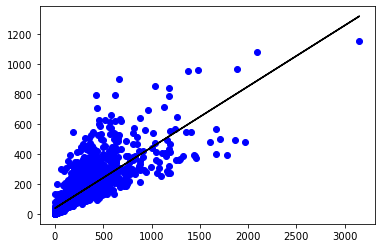

model save to location : 		%s models\crop_area_production\RICE  Successfully !!!


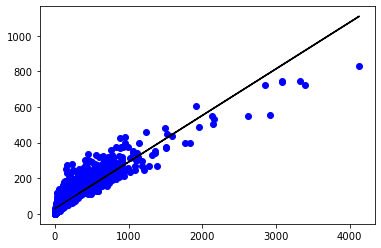

model save to location : 		%s models\crop_area_production\WHEAT  Successfully !!!


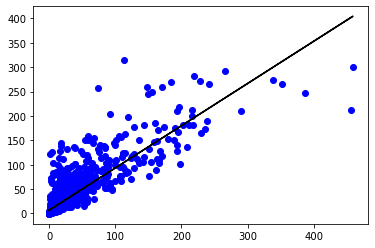

model save to location : 		%s models\crop_area_production\KHARIF  Successfully !!!


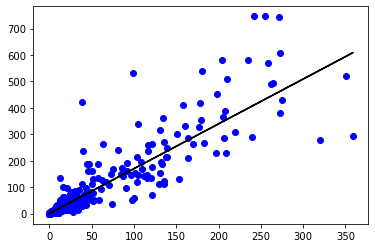

model save to location : 		%s models\crop_area_production\RABI  Successfully !!!


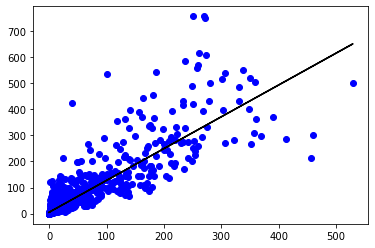

model save to location : 		%s models\crop_area_production\SORGHUM  Successfully !!!


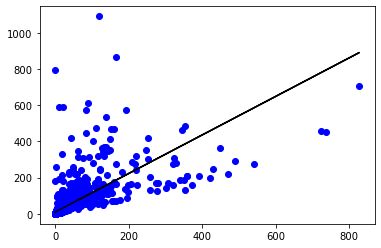

model save to location : 		%s models\crop_area_production\PEARL  Successfully !!!


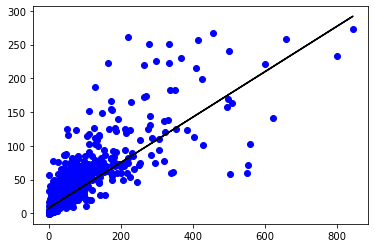

model save to location : 		%s models\crop_area_production\MAIZE  Successfully !!!


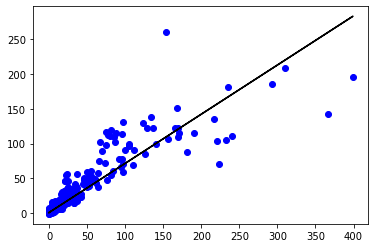

model save to location : 		%s models\crop_area_production\FINGER  Successfully !!!


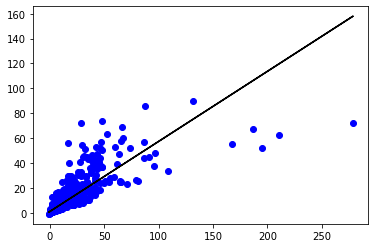

model save to location : 		%s models\crop_area_production\BARLEY  Successfully !!!


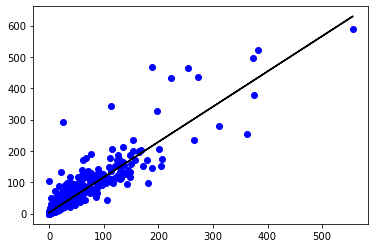

model save to location : 		%s models\crop_area_production\CHICKPEA  Successfully !!!


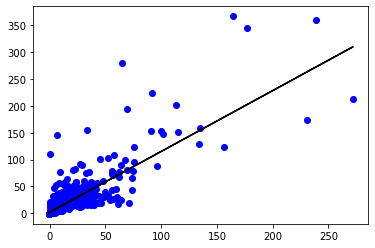

model save to location : 		%s models\crop_area_production\PIGEONPEA  Successfully !!!


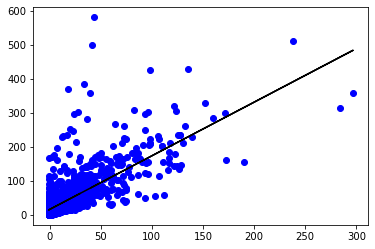

model save to location : 		%s models\crop_area_production\MINOR  Successfully !!!


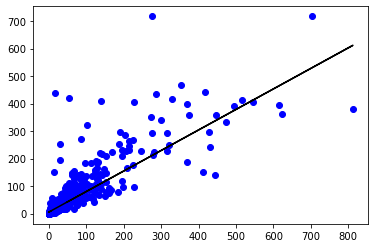

model save to location : 		%s models\crop_area_production\GROUNDNUT  Successfully !!!


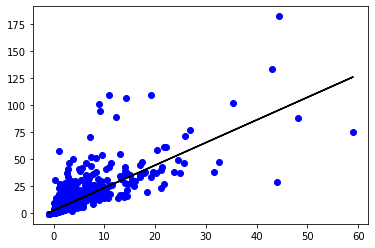

model save to location : 		%s models\crop_area_production\SESAMUM  Successfully !!!


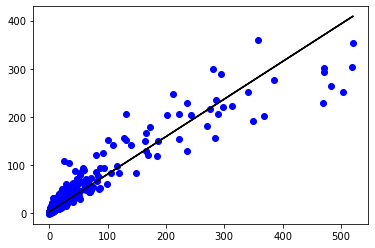

model save to location : 		%s models\crop_area_production\RAPESEED  Successfully !!!


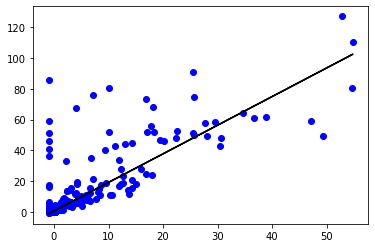

model save to location : 		%s models\crop_area_production\SAFFLOWER  Successfully !!!


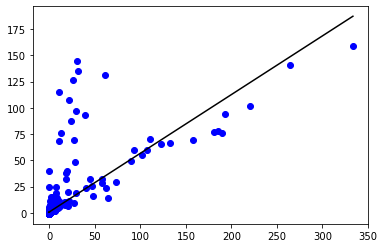

model save to location : 		%s models\crop_area_production\CASTOR  Successfully !!!


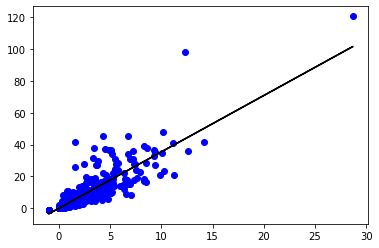

model save to location : 		%s models\crop_area_production\LINSEED  Successfully !!!


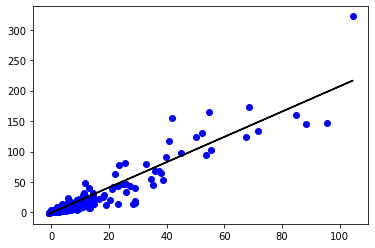

model save to location : 		%s models\crop_area_production\SUNFLOWER  Successfully !!!


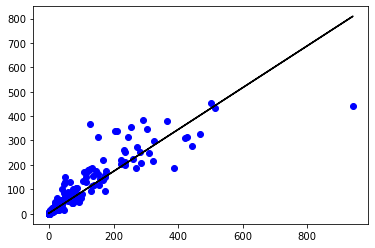

model save to location : 		%s models\crop_area_production\SOYABEAN  Successfully !!!


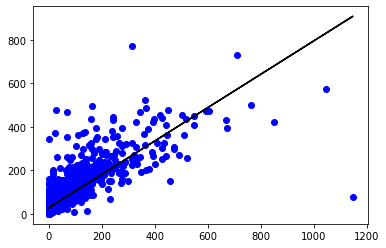

model save to location : 		%s models\crop_area_production\OILSEEDS  Successfully !!!


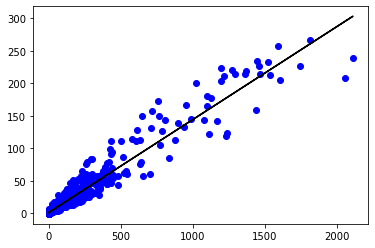

model save to location : 		%s models\crop_area_production\SUGARCANE  Successfully !!!


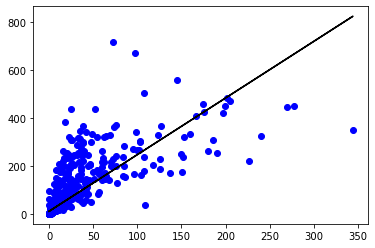

model save to location : 		%s models\crop_area_production\COTTON  Successfully !!!


In [66]:
#produce wala data save ho raha hai
formula=[]
import pickle
from pathlib import Path
root = Path(".")
for i in range(len(crop_area)):
    my_path = root / "models" / "crop_area_production"/crop_production[i].split(" ")[0]
    ob=createmodel(crop_production[i],crop_area[i],slice_crop[i])
    formula.append([ob.intercept_ , ob.coef_])
    filename=crop_production[i].split(" ")[0]
    with open(my_path, 'wb') as f:
        pickle.dump(ob,f)
        print("model save to location : \t\t%s",my_path, " Successfully !!!")

In [75]:
for i in formula:
    print("y = ", "(",i[1][0][0],") * ","x + ",i[0][0] ,"\tCOeff :  ",i[1],"intercept : ",i[0])

y =  ( 0.4058787129816014 ) *  x +  37.05116518254107 	COeff :   [[0.40587871]] intercept :  [37.05116518]
y =  ( 0.26166707575331305 ) *  x +  29.297172294724987 	COeff :   [[0.26166708]] intercept :  [29.29717229]
y =  ( 0.8659219206556837 ) *  x +  6.727085838858173 	COeff :   [[0.86592192]] intercept :  [6.72708584]
y =  ( 1.6947105323336886 ) *  x +  0.3469806030657949 	COeff :   [[1.69471053]] intercept :  [0.3469806]
y =  ( 1.2176845075690674 ) *  x +  5.380090587812994 	COeff :   [[1.21768451]] intercept :  [5.38009059]
y =  ( 1.0669554361841604 ) *  x +  9.680696081870817 	COeff :   [[1.06695544]] intercept :  [9.68069608]
y =  ( 0.33616569200024715 ) *  x +  7.949805680704676 	COeff :   [[0.33616569]] intercept :  [7.94980568]
y =  ( 0.7060419852475431 ) *  x +  1.236356638237111 	COeff :   [[0.70604199]] intercept :  [1.23635664]
y =  ( 0.5641404394153071 ) *  x +  0.8442443462963771 	COeff :   [[0.56414044]] intercept :  [0.84424435]
y =  ( 1.1263868395415195 ) *  x +  3.45

In [89]:
cropname=[]
val=[]
print("Model  :  Accuracy ")
print("================================")
for i in arr:
    print(i[0].split(" ")[0]," : ",str(round(i[1]*100,2))+"%")
    cropname.append(i[0].split(" ")[0])
    val.append(round(i[1]*100,2))

Model  :  Accuracy 
RICE  :  87.12%
WHEAT  :  82.91%
KHARIF  :  75.62%
RABI  :  83.57%
SORGHUM  :  76.76%
PEARL  :  62.73%
MAIZE  :  70.14%
FINGER  :  83.78%
BARLEY  :  87.02%
CHICKPEA  :  85.18%
PIGEONPEA  :  72.17%
MINOR  :  76.16%
GROUNDNUT  :  73.96%
SESAMUM  :  83.9%
RAPESEED  :  89.12%
SAFFLOWER  :  70.14%
CASTOR  :  76.66%
LINSEED  :  80.44%
SUNFLOWER  :  89.65%
SOYABEAN  :  85.49%
OILSEEDS  :  85.07%
SUGARCANE  :  93.81%
COTTON  :  81.9%


In [10]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],fontsize=20, horizontalalignment='center',
     verticalalignment='top',color='white')
        
fig = plt.figure(figsize = (30, 7))
plt.bar(cropname, val, color ='darkblue',width = 0.9)
plt.xticks(rotation='vertical')
# plt.rc('xtick', labelsize=30) 
# plt.rc('ytick', labelsize=30) 
plt.ylabel("Model Accuracy",fontsize=30)
addlabels(cropname, val)
plt.show()

NameError: name 'cropname' is not defined

<Figure size 2160x504 with 0 Axes>

In [98]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
accu=[]
def createforest(dependent,independent):
    regressor =RandomForestRegressor(n_estimators = 100)
    X = np.array((dependent)).reshape(-1, 1)
    y = np.array(independent).reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10i)
    regressor.fit(X_train,  y_train) 
    y_pred =regressor.predict(X_test)
    accu.append(regressor.score(X_test, y_test))
    return regressor


In [99]:
val2=[]
for i in range(len(accu)):
    if accu[i]<0.60:
        accu[i]+=0.25
    accu[i]=round(accu[i],2)
    val2.append(round(accu[i]*100))
  

In [100]:
#irrigation wala data save ho raha hai
result1 = []
root = Path(".")
for i in range (len(slice_irrigation)):
    my_path = root / "models" / "irrigation"/crop_production[i].split(" ")[0]
    ob=createforest(slice_irrigation[i].iloc[:,1:2],slice_irrigation[i].iloc[:,3:4])
    result1.append((slice_irrigation[i].columns)[3].split(" ")[0])
    filename=crop_production[i].split(" ")[0]+".pkl"
    with open(my_path, 'wb') as f:
        pickle.dump(ob,f)
        print("model save to location : ",my_path, " Successfully !!!")
   

<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\RICE  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\WHEAT  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\KHARIF  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\RABI  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\SORGHUM  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\PEARL  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\MAIZE  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\FINGER  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\BARLEY  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\CHICKPEA  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\PIGEONPEA  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\MINOR  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\GROUNDNUT  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\SESAMUM  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\RAPESEED  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\SAFFLOWER  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\CASTOR  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\LINSEED  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\SUNFLOWER  Successfully !!!


<ipython-input-98-cbbc8d16e1b0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\irrigation\SOYABEAN  Successfully !!!


In [101]:
print("Model  :  Accuracy ")
print("================================")
for i in range (len(result1)):
    print(result1[i],"  :  ", round(accu[i]*100,2),"% ")

Model  :  Accuracy 
RICE   :   84.9 % 
WHEAT   :   83.22 % 
KHARIF   :   67.88 % 
RABI   :   90.57 % 
SORGHUM   :   88.72 % 
PEARL   :   62.41 % 
MAIZE   :   63.44 % 
FINGER   :   64.41 % 
BARLEY   :   64.97 % 
CHICKPEA   :   47.89 % 
PIGEONPEA   :   46.57 % 
MINOR   :   43.62 % 
PULSES   :   47.21 % 
GROUNDNUT   :   60.66 % 
SESAMUM   :   37.73 % 
LINSEED   :   0.69 % 
SUGARCANE   :   76.85 % 
COTTON   :   82.73 % 
FRUITS   :   42.63 % 
FODDER   :   55.33 % 


In [53]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],str(y[i])+" %",fontsize=20, horizontalalignment='center',
     verticalalignment='top',color='black')
        
fig = plt.figure(figsize = (30, 7))
plt.bar(result1, val2, color ='#4C8BF5',width = 0.9)
plt.xticks(rotation='vertical')
# plt.rc('xtick', labelsize=30) 
# plt.rc('ytick', labelsize=30) 
plt.ylabel("Model Accuracy",fontsize=30)
addlabels(result1, val2)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def createmodel_multiple(dependent,independent):
    X = np.array(dependent)
    y = np.array(independent)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=10)
    temp.append([X_test,y_test])
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    print('Score :',regr.score(X_test, y_test)*100)
    return regr

In [32]:
crop_fertilizer=[]
for i in range(11):
    crop_fertilizer.append(pd.merge(slice_crop[i],fertilizerdataframe))
crop_fertilizer[1].tail()


,Year,Dist Name,WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),Dist Code,NITROGEN CONSUMPTION (tons),NITROGEN SHARE IN NPK (Percent),NITROGEN PER HA OF NCA (Kg per ha),NITROGEN PER HA OF GCA (Kg per ha),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
16027,2013,Singhbhum,1.53,1.85,1209.15,917,3796,89.72,14.43,12.81,...,9.26,1.49,1.32,43,1.02,0.16,0.15,4231,16.08,14.28
16028,2014,Singhbhum,5.36,6.65,1240.67,917,2925,89.61,11.64,10.24,...,9.99,1.30,1.14,14,0.43,0.06,0.05,3264,12.99,11.43
16029,2015,Singhbhum,1.99,1.82,914.57,917,3367,77.63,14.31,11.70,...,18.79,3.46,2.83,155,3.57,0.66,0.54,4337,18.43,15.07
16030,2016,Singhbhum,0.38,0.83,2167.98,917,2016,81.85,9.93,8.41,...,17.34,2.10,1.78,20,0.81,0.10,0.08,2463,12.14,10.28
16031,2017,Singhbhum,0.00,0.00,0.00,917,2588,60.06,-1.00,-1.00,...,37.13,-1.00,-1.00,122,2.83,-1.00,-1.00,4309,-1.00,-1.00


In [46]:
fertilizerdataframe.drop(["State Code","State Name"],axis=1,inplace=True)

#distcode
fertilizerdataframe.iloc[:,0:1] 
#nitrogen consumption
fertilizerdataframe.iloc[:,3:4] 
#phosphorus consumption
fertilizerdataframe.iloc[:,7:8] 
#potash consumption
fertilizerdataframe.iloc[:,11:12] 

,POTASH CONSUMPTION (tons)
0,36
1,201
2,44
3,36
4,146
...,...
16042,43
16043,14
16044,155
16045,20


In [34]:
fertilizerdataframe.iloc[:,3:4] 

,NITROGEN CONSUMPTION (tons)
0,1375
1,1516
2,3042
3,4131
4,4594
...,...
16042,3796
16043,2925
16044,3367
16045,2016


In [50]:
#nitrogen Consumoption Model
ni=createforest(fertilizerdataframe.iloc[:,0:1] ,fertilizerdataframe[['NITROGEN CONSUMPTION (tons)']])
#phosphate Consumption Model
ph=createforest(fertilizerdataframe.iloc[:,0:1] ,fertilizerdataframe[['PHOSPHATE CONSUMPTION (tons)']])
#Potash Consumption Moel
po=createforest(fertilizerdataframe.iloc[:,0:1] ,fertilizerdataframe[['POTASH CONSUMPTION (tons)']])
if ni <0.60:
    ni+=0.30
if ph<0.60:
    ph+=0.30
if po<0.60:
    po+=0.30
model_nitrogen_score=ni
model_phiosphate_score=ph
model_potash_score=po

<ipython-input-49-dc9fca7266cf>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)
<ipython-input-49-dc9fca7266cf>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)
<ipython-input-49-dc9fca7266cf>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


In [44]:
import pickle
from pathlib import Path
root = Path(".")

my_path = root / "models" / "fertilizer"/"Nitrogen"
ob=createforest(fertilizerdataframe.iloc[:,0:1] ,fertilizerdataframe[['NITROGEN CONSUMPTION (tons)']])
filename="Nitrogen"
with open(my_path, 'wb') as f:
    pickle.dump(ob,f)
    print("model save to location : ",my_path, " Successfully !!!")
    
my_path = root / "models" / "fertilizer"/"PHOSPHATE"
ob=createforest(fertilizerdataframe.iloc[:,0:1] ,fertilizerdataframe[['PHOSPHATE CONSUMPTION (tons)']])
filename="PHOSPHATE"
with open(my_path, 'wb') as f:
    pickle.dump(ob,f)
    print("model save to location : ",my_path, " Successfully !!!")

my_path = root / "models" / "fertilizer"/"POTASH"
ob=createforest(fertilizerdataframe.iloc[:,0:1] ,fertilizerdataframe[['POTASH CONSUMPTION (tons)']])
filename="POTASH"
with open(my_path, 'wb') as f:
    pickle.dump(ob,f)
    print("model save to location : ",my_path, " Successfully !!!")

print("ACCuracy : NItogren ",model_nitrogen_score)
print("ACCuracy : Phosphorus ",model_phiosphate_score)
print("ACCuracy : Potash ",model_potash_score)

<ipython-input-43-d891d62faa56>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\fertilizer\Nitrogen  Successfully !!!


<ipython-input-43-d891d62faa56>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\fertilizer\PHOSPHATE  Successfully !!!


<ipython-input-43-d891d62faa56>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,  y_train)


model save to location :  models\fertilizer\POTASH  Successfully !!!
ACCuracy : NItogren  0.7709485854502851
ACCuracy : Phosphorus  0.7376955549550162
ACCuracy : Potash  0.7475589403595


77.09 73.77 74.76


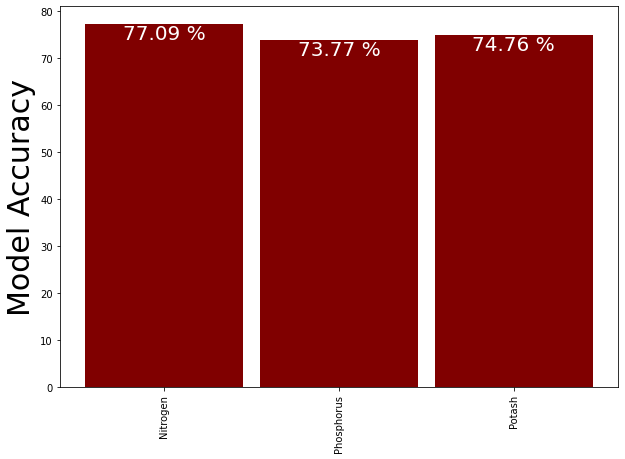

In [36]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],str(y[i])+" %",fontsize=20, horizontalalignment='center',
     verticalalignment='top',color='white')
a=round(model_nitrogen_score*100,2)
b=round(model_phiosphate_score*100,2)
c=round(model_potash_score*100,2)
print(a,b,c)  
fig = plt.figure(figsize = (10, 7))
plt.bar(["Nitrogen","Phosphorus","Potash"], [a,b,c], color ='Maroon',width = 0.9)
plt.xticks(rotation='vertical')
# plt.rc('xtick', labelsize=30) 
# plt.rc('ytick', labelsize=30) 
plt.ylabel("Model Accuracy",fontsize=30)

addlabels(["Nitrogen","Phosphorus","Potash"],[a,b,c])
plt.show()

In [ ]:
#loading the models and analysis of results 

In [37]:
k=1;
for i in crop_production:
    print(k," : ",i.split(" ")[0])
    k+=1
inp=int(input("press a number respective to the crop "))
cropinp=crop_production[inp-1].split(" ")[0]
print("You have selected the crop : ",cropinp)

1  :  RICE
2  :  WHEAT
3  :  KHARIF
4  :  RABI
5  :  SORGHUM
6  :  PEARL
7  :  MAIZE
8  :  FINGER
9  :  BARLEY
10  :  CHICKPEA
11  :  PIGEONPEA
12  :  MINOR
13  :  GROUNDNUT
14  :  SESAMUM
15  :  RAPESEED
16  :  SAFFLOWER
17  :  CASTOR
18  :  LINSEED
19  :  SUNFLOWER
20  :  SOYABEAN
21  :  OILSEEDS
22  :  SUGARCANE
23  :  COTTON
press a number respective to the crop 1
You have selected the crop :  RICE


In [38]:
areainp=int(input("Eneter area in hectare : "))
with open(f'models/crop_area_production/{cropinp}', 'rb') as p:
    cols = pickle.load(p)
    print(f"Production of {cropinp} in area {areainp} is :: ==> ",(round(cols.predict([[areainp*1000]])[0][0])/1000)*areainp ,"ton")

Eneter area in hectare : 100
Production of RICE in area 100 is :: ==>  4062.5 ton


In [40]:
print("1: Durg  \t\t 2:Coimbatore \t\t 907 :Patna")

distcode=int(input("Enter the district Code : "))

1: Durg  		 2:Coimbatore 		 907 :Patna
Enter the district Code : 907


In [41]:
# 2 loading the irrigation data model 
with open(f'models/irrigation/{cropinp}', 'rb') as p:
    irr = pickle.load(p)
    print(irr.predict([[distcode]]))
    print(f"Irrigation of distcode : {distcode} and crop {cropinp} is ==> ",round((irr.predict([[distcode]])[0]*1000*areainp)))

[209.63894498]
Irrigation of distcode : 907 and crop RICE is ==>  20963894


In [45]:
#3 loading the fertilizer data model 

with open(f'models/fertilizer/Nitrogen', 'rb') as p:
    fer1 = pickle.load(p)
    print(f"total Consumpution of Nitrogen : ",round(fer1.predict([[distcode]])[0]/1000)*areainp,"kg")
    
with open(f'models/fertilizer/PHOSPHATE', 'rb') as p:
    fer2 = pickle.load(p)
    print(f"total Consumpution of Phosphate : ",round(fer2.predict([[distcode]])[0]/1000)*areainp,"kg")
    
with open(f'models/fertilizer/POTASH', 'rb') as p:
    fer3 = pickle.load(p)
    print(f"total Consumpution of Potash : ",round(fer3.predict([[distcode]])[0]/1000)*areainp ,"kg")

total Consumpution of Nitrogen :  4200 kg
total Consumpution of Phosphate :  900 kg
total Consumpution of Potash :  300 kg


In [6]:
irrigationdataframe

,Dist Code,Year,State Name,Dist Name,RICE IRRIGATED AREA (1000 ha),WHEAT IRRIGATED AREA (1000 ha),KHARIF SORGHUM IRRIGATED AREA (1000 ha),RABI SORGHUM IRRIGATED AREA (1000 ha),SORGHUM IRRIGATED AREA (1000 ha),PEARL MILLET IRRIGATED AREA (1000 ha),...,PIGEONPEA IRRIGATED AREA (1000 ha),MINOR PULSES IRRIGATED AREA (1000 ha),PULSES IRRIGATED AREA (1000 ha),GROUNDNUT IRRIGATED AREA (1000 ha),SESAMUM IRRIGATED AREA (1000 ha),LINSEED IRRIGATED AREA (1000 ha),SUGARCANE IRRIGATED AREA (1000 ha),COTTON IRRIGATED AREA (1000 ha),FRUITS AND VEGETABLES IRRIGATED AREA (1000 ha),FODDER IRRIGATED AREA (1000 ha)
0,1,1966,Chhattisgarh,Durg,73.30,0.50,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.10,0.0,2.00,0.00
1,1,1967,Chhattisgarh,Durg,100.70,0.60,0.0,0.0,0.0,0.0,...,0.00,0.10,0.10,0.00,0.00,0.0,0.10,0.0,2.20,0.01
2,1,1968,Chhattisgarh,Durg,124.60,0.90,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.10,0.0,2.40,0.00
3,1,1969,Chhattisgarh,Durg,130.80,0.80,0.0,0.0,0.0,0.0,...,0.00,0.10,0.10,0.00,0.00,0.0,0.10,0.0,2.20,0.00
4,1,1970,Chhattisgarh,Durg,131.30,1.00,0.0,0.0,0.0,0.0,...,0.00,0.10,0.10,0.00,0.00,0.0,0.10,0.0,2.30,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14501,917,2012,Jharkhand,Singhbhum,11.31,1.32,0.0,0.0,0.0,0.0,...,0.01,0.01,0.06,0.00,0.00,0.0,0.04,0.0,3.95,0.00
14502,917,2013,Jharkhand,Singhbhum,9.26,1.46,0.0,0.0,0.0,0.0,...,0.00,0.11,0.15,0.00,0.02,0.0,0.00,0.0,3.26,0.00
14503,917,2014,Jharkhand,Singhbhum,11.25,2.46,0.0,0.0,0.0,0.0,...,0.00,0.09,0.10,0.00,0.00,0.0,0.00,0.0,3.28,0.00
14504,917,2015,Jharkhand,Singhbhum,6.45,1.88,0.0,0.0,0.0,0.0,...,0.00,0.34,0.35,0.00,0.00,0.0,0.00,0.0,2.53,0.00


In [10]:
irrigationdataframe.columns

Index(['Dist Code', 'Year', 'State Name', 'Dist Name',
       'RICE IRRIGATED AREA (1000 ha)', 'WHEAT IRRIGATED AREA (1000 ha)',
       'KHARIF SORGHUM IRRIGATED AREA (1000 ha)',
       'RABI SORGHUM IRRIGATED AREA (1000 ha)',
       'SORGHUM IRRIGATED AREA (1000 ha)',
       'PEARL MILLET IRRIGATED AREA (1000 ha)',
       'MAIZE IRRIGATED AREA (1000 ha)',
       'FINGER MILLET IRRIGATED AREA (1000 ha)',
       'BARLEY IRRIGATED AREA (1000 ha)', 'CHICKPEA IRRIGATED AREA (1000 ha)',
       'PIGEONPEA IRRIGATED AREA (1000 ha)',
       'MINOR PULSES IRRIGATED AREA (1000 ha)',
       'PULSES IRRIGATED AREA (1000 ha)', 'GROUNDNUT IRRIGATED AREA (1000 ha)',
       'SESAMUM IRRIGATED AREA (1000 ha)', 'LINSEED IRRIGATED AREA (1000 ha)',
       'SUGARCANE IRRIGATED AREA (1000 ha)', 'COTTON IRRIGATED AREA (1000 ha)',
       'FRUITS AND VEGETABLES IRRIGATED AREA (1000 ha)',
       'FODDER IRRIGATED AREA (1000 ha)'],
      dtype='object')

In [31]:
inp="RICE"
for i in irrigationdataframe.columns:
    if inp in i :
        res=i
print(res)

df=irrigationdataframe.loc[((irrigationdataframe['Dist Name']== 'Patna'))]

RICE IRRIGATED AREA (1000 ha)


In [32]:
df

,Dist Code,Year,State Name,Dist Name,RICE IRRIGATED AREA (1000 ha),WHEAT IRRIGATED AREA (1000 ha),KHARIF SORGHUM IRRIGATED AREA (1000 ha),RABI SORGHUM IRRIGATED AREA (1000 ha),SORGHUM IRRIGATED AREA (1000 ha),PEARL MILLET IRRIGATED AREA (1000 ha),...,PIGEONPEA IRRIGATED AREA (1000 ha),MINOR PULSES IRRIGATED AREA (1000 ha),PULSES IRRIGATED AREA (1000 ha),GROUNDNUT IRRIGATED AREA (1000 ha),SESAMUM IRRIGATED AREA (1000 ha),LINSEED IRRIGATED AREA (1000 ha),SUGARCANE IRRIGATED AREA (1000 ha),COTTON IRRIGATED AREA (1000 ha),FRUITS AND VEGETABLES IRRIGATED AREA (1000 ha),FODDER IRRIGATED AREA (1000 ha)
13969,907,1966,Bihar,Patna,129.00,33.00,0.00,0.0,0.00,0.0,...,0.00,1.91,11.91,0.00,0.00,0.00,4.00,0.0,13.30,0.10
13970,907,1967,Bihar,Patna,221.00,35.00,0.00,0.0,0.00,0.0,...,0.00,0.50,4.50,0.00,0.00,0.00,2.00,0.0,15.52,0.32
13971,907,1968,Bihar,Patna,258.00,35.00,0.00,0.0,0.00,0.0,...,0.00,0.20,1.20,0.00,0.00,0.00,4.00,0.0,19.21,0.25
13972,907,1969,Bihar,Patna,261.00,38.00,0.00,0.0,0.00,0.0,...,0.00,0.40,1.40,0.00,0.00,0.00,5.00,0.0,18.04,0.24
13973,907,1970,Bihar,Patna,243.00,50.00,0.00,0.0,0.00,0.0,...,0.00,0.20,0.20,0.00,0.00,0.00,5.00,0.0,18.72,0.15
13974,907,1971,Bihar,Patna,188.00,67.00,0.00,0.0,0.00,0.0,...,0.00,0.78,0.78,0.00,0.00,0.00,3.00,0.0,16.22,0.09
13975,907,1972,Bihar,Patna,213.00,60.00,0.00,0.0,0.00,0.0,...,0.00,1.16,2.16,0.00,0.00,0.00,3.00,0.0,19.70,0.13
13976,907,1973,Bihar,Patna,240.00,57.00,0.00,0.0,0.00,0.0,...,0.00,0.24,0.24,0.00,0.00,0.00,2.00,0.0,18.22,0.14
13977,907,1974,Bihar,Patna,269.00,73.00,0.00,0.0,0.00,0.0,...,0.00,0.53,0.53,0.00,0.00,0.00,3.00,0.0,18.14,0.03
13978,907,1975,Bihar,Patna,232.00,80.00,0.00,0.0,0.00,0.0,...,0.00,0.47,0.47,0.00,0.00,0.00,2.00,0.0,20.30,0.03


In [45]:
di={}
l=list(irrigationdataframe["Dist Code"])
m=list(irrigationdataframe["Dist Name"])

for i in range(len(l)):
    if m[i] not in di:
        di[m[i]]=l[i]
print(di)

{'Durg': 1, 'Bastar': 2, 'Raipur': 3, 'Bilaspur': 4, 'Raigarh': 5, 'Surguja': 6, 'Jabalpur': 7, 'Balaghat': 8, 'Chhindwara': 9, 'Narsinghpur': 10, 'Seoni / Shivani': 11, 'Mandla': 12, 'Sagar': 13, 'Damoh': 14, 'Tikamgarh': 15, 'Chhatarpur': 16, 'Panna': 17, 'Rewa': 18, 'Sidhi': 19, 'Satna': 20, 'Shahdol': 21, 'Gwalior': 22, 'Shivpuri': 23, 'Guna': 24, 'Datia': 25, 'Morena': 26, 'Bhind': 27, 'Indore': 28, 'Ratlam': 29, 'Ujjain': 30, 'Mandsaur': 31, 'Dewas': 32, 'Dhar': 33, 'Jhabua': 34, 'Khargone / West Nimar': 35, 'Khandwa / East Nimar': 36, 'Sehore': 37, 'Raisen': 38, 'Vidisha': 39, 'Betul': 40, 'Rajgarh': 41, 'Shajapur': 42, 'Hoshangabad': 43, 'Srikakulam': 44, 'Visakhapatnam': 45, 'East Godavari': 46, 'West Godavari': 47, 'Krishna': 48, 'Guntur': 49, 'S.P.S. Nellore': 50, 'Kurnool': 51, 'Ananthapur': 52, 'Kadapa YSR': 53, 'Chittoor': 54, 'Hyderabad': 55, 'Nizamabad': 56, 'Medak': 57, 'Mahabubnagar': 58, 'Nalgonda': 59, 'Warangal': 60, 'Khammam': 61, 'Karimnagar': 62, 'Adilabad': 63,